In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


encoding data

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test =  vectorize_sequences(test_data)

build one hot encoding to categorical labels 

In [12]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [15]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

model definition: on model definition do not make small node network on hidden layers than node on output layers, it can be bottleneck problems, so some information would be loss

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

split train into validation to evaluate models

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train, partial_y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 549us/step - loss: 2.7333 - accuracy: 0.4714 - val_loss: 1.7619 - val_accuracy: 0.6290
Epoch 2/20
7982/7982 [==============================] - 2s 235us/step - loss: 1.4497 - accuracy: 0.7020 - val_loss: 1.3258 - val_accuracy: 0.7110
Epoch 3/20
7982/7982 [==============================] - 2s 219us/step - loss: 1.0778 - accuracy: 0.7676 - val_loss: 1.1495 - val_accuracy: 0.7570
Epoch 4/20
7982/7982 [==============================] - 2s 253us/step - loss: 0.8571 - accuracy: 0.8170 - val_loss: 1.0701 - val_accuracy: 0.7680
Epoch 5/20
7982/7982 [==============================] - 2s 245us/step - loss: 0.6859 - accuracy: 0.8567 - val_loss: 0.9741 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 2s 240us/step - loss: 0.5564 - accuracy: 0.8789 - val_loss: 0.9420 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 2s 217us/step - loss

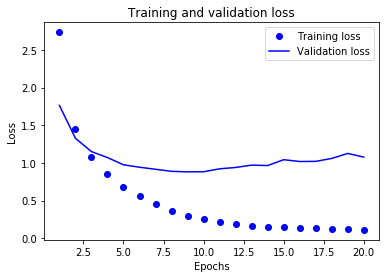

In [24]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

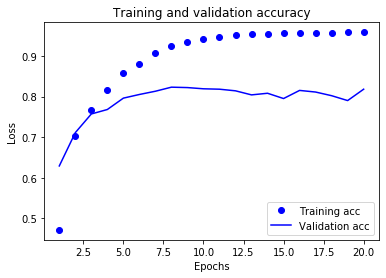

In [27]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

retrain a already model but we limit epochs to 9 cause overfitting happen after nine epoch, and test model on neverseen data test

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train,
         epochs=9, batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 304us/step - loss: 2.5821 - accuracy: 0.4952 - val_loss: 1.7511 - val_accuracy: 0.6390
Epoch 2/9
7982/7982 [==============================] - 2s 228us/step - loss: 1.3972 - accuracy: 0.7050 - val_loss: 1.2982 - val_accuracy: 0.7190
Epoch 3/9
7982/7982 [==============================] - 2s 245us/step - loss: 1.0275 - accuracy: 0.7808 - val_loss: 1.1072 - val_accuracy: 0.7640
Epoch 4/9
7982/7982 [==============================] - 2s 238us/step - loss: 0.8011 - accuracy: 0.8350 - val_loss: 1.0119 - val_accuracy: 0.7910
Epoch 5/9
7982/7982 [==============================] - 2s 262us/step - loss: 0.6405 - accuracy: 0.8705 - val_loss: 0.9423 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.5083 - accuracy: 0.8998 - val_loss: 0.8735 - val_accuracy: 0.8190
Epoch 7/9
7982/7982 [==============================] - 2s 235us/step - loss: 0.405

In [32]:
results

[1.0003737140105222, 0.7818343639373779]

there are two ways to handle labels in multiclass classification:
- encoding the labels via categorical encoding (also known as one-hot-encoding) using categorical_crossentropy as a loss function
- encoding labels as integers using sparse_categorical_crossentropy loss function